# 레고 분석
<img src="assets/bricks.jpg">

- 레고 데이터셋은 회사의 역사, 출시 제품, 어떤 레고 세트가 제일 잘 나가는지에 대한 여러 흥미로운 질문에 답하는데 도움이 될 것이다. 아래의 질문들을 바탕으로 분석하고자 한다. 
    - 지금까지 만들어진 가장 거대한 레고 세트는 무엇이며 몇 개의 부품으로 구성되어 있을까?
    - 최초의 레고 세트가 출시된 연도와 처음 출시되었을 때 회사에서 판매한 세트 수는 몇 개일까?
    - 레고에서 가장 많은 세트를 보유한 테마는 어떤 것일까? 해리포터, 닌자고, 프렌즈 아니면 다른 것일까?
    - 레고 회사는 실제로 언제 출시된 제품을 기반으로 도약했을까? 매년 몇 개의 테마와 세트가 출시될까?
    - 레고 세트는 해가 갈수록 크기와 복잡도가 늘어날까? 예전 레고 세트는 요즘 세트와 비교했을 때 부품이 더 적을까?

## 1. 레고에 대한 이해

#### Lego Themes와 Lego Sets에 대한 이해
Lego Themes: 한국에서는 "시리즈"라고 명칭한다. 레고 매장에 들어가면 테마별로 구성된 제품을 볼 수 있다. 각각 스타워즈, 배트맨, 해리포터 시리즈 그리고 더 많은 것들이 포함되어 있다.

<img src="assets/lego_themes.png">

레고 세트: 레고 세트는 레고나 제품의 특정한 상자이므로, 일반적으로 하나의 테마에는 다양한 세트가 존재한다. 

<img src="assets/lego_sets.png">

예) "베트맨" 시리즈의 "베트 모빌 베이스 세트"

## 2. 데이터 탐색 및 데이터 전처리

In [1]:
# 필요한 패키지 임포트 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 2-1. 컬러 데이터

In [2]:
# 레고 블록 색상 데이터 불러오기
colors = pd.read_csv("data/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
# 색상의 수 체크 
colors['name'].nunique()

135

- 색상의 이름과 해당 RGB 값이 있는 다섯개의 컬럼이 있음을 알 수 있다.
    - id: 해당 데이터의 id 값
    - name: 레고 블록 컬러명
    - rgb: 레고 블록 컬러 RGB 값
    - is_trans: 투명도 (f:불투명/t:투명)
- 컬러 데이터의 수는 컬럼 4개 행 135개로 구성되어 있다. 

#### 투명한 색상의 개수 구하기 

In [8]:
# 투명도 비율 계산
transparency_counts = colors['is_trans'].value_counts()    # 투명도 색상 개수 체크 

# 투명도 개수 추출 
transparent_count = transparency_counts.get('t', 0)        # 투명 개수 추출 
opaque_count = transparency_counts.get('f', 0)             # 불투명 개수 추출 

# 투명도 비율 계산
transparency_ratio = (transparent_count / (transparent_count + opaque_count)) * 100

# 결과 출력
print("Transparent Count:", transparent_count)
print("Opaque Count:", opaque_count)
print("Transparency Ratio:", round(transparency_ratio, 2))

Transparent Count: 28
Opaque Count: 107
Transparency Ratio: 20.74


- 확인 결과 불투명한 색상은 107건 투명한 색상은 28건으로 조회 되었다. 
- 아울러 블럭 색상중 투명 색상의 블록은 전체 색상 대비 21%의 비율을 차지 했다.

### 2-2. 레고 세트 데이터

In [9]:
# 레고 세트 목록 데이터 불러오기 
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


#### 레고 세트가 출시된 연도와 판매 개수

In [12]:
# 최초의 레고 세트가 출시된 연도와 세트 이름 - 또다른 방법
sets.sort_values('year').head(10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


In [11]:
# 레고는 운영 첫해에 얼마나 많은 제품을 팔았는지 계산
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


- 최초의 레고 세트가 출시된 연도와 이 세트의 이름은 "1949년도"에 최초로 출시한 "Extra-Large Gift Set (ABB)" 이다.
- 그리고 레고 운영 첫해에 5가지 세트만 판매했다.

#### 부품수가 가장 많은 레고 세트는?

In [13]:
# 부품 수가 가장 많은 상위 5개 레고 세트는 
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


- 부품 수가 가장 많은 상위 5개의 레고를 추출했다. 결과는 부품수가 많은 순서대로 아래와 같다. 
    - The Ultimate Battle for Chima, 부품수 9,987개
    - UCS Millennium Falcon, 부품수 7,541개
    - Hogwarts Castle, 부품수 6,020개
    - Taj Mahal(2017), 부품수 5,923개
    - Taj Mahal(2008), 부품수 5,922개

## 3. 시각화 및 분석

### 3-1. 연도 별 출시된 레고 세트수

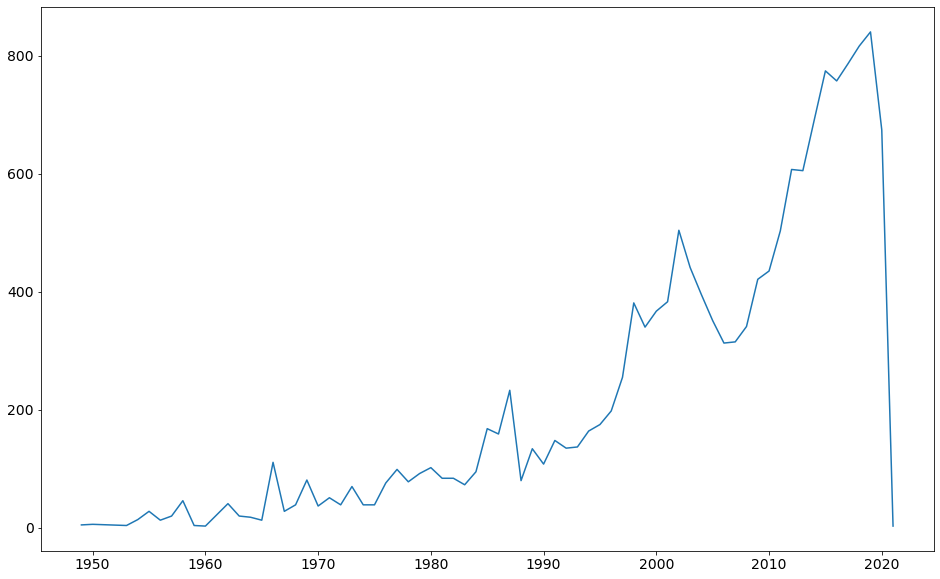

In [14]:
# 연도 별 출시된 레고 세트 수 시각화 
sets_by_year = sets.groupby('year').count()

# 년도별 출시 세트수 꺾은선 그래프로 나타내기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index, sets_by_year.set_num)

plt.show()

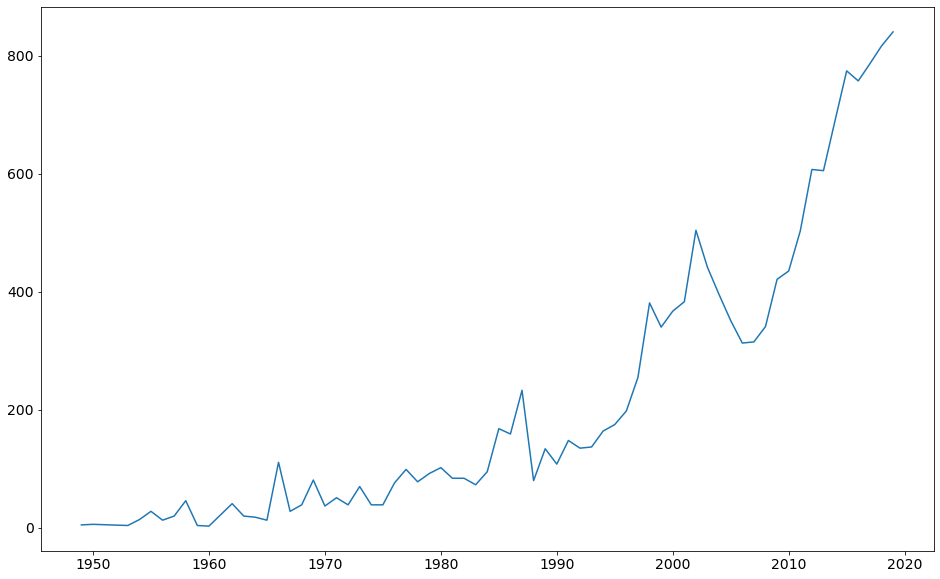

In [15]:
# 연도 별 출시된 레고 세트 수 시각화 - 2020년 후반 데이터 삭제 후 다시 그래프 그리기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

plt.show()

- 데이터에는 2021년 데이터도 있다. 해당 데이터는 2020년 후반 데이터 이므로, 미래 지향적 기준으로 일부 세트가 이미 포함된 것으로 보여진다. 해당 데이터는 차트를 그릴 때 고려해야할 점 이다.
- 레고가 운영 초반 몇 년 동안은 10가지 미만의 서로 다른 세트를 출시했다는 점을 알 수 있다. 하지만 2019년부터 회사가 놀랄 정도로 성장하여 해당 한해 동안 840 세트나 출시 하였다.
- 레고는 처음 45여 년간 제공하는 제품을 꾸준히 증가시켰지만, 실제로 회사에서 생상한 세트 수가 급격히 증가한 것은 1990년대 중반 이었다. 또한 차트에서 2000년대 초반에 잠시 하락했고, 2005년경 강한 회복을 보여주다. 2008년도 글로벌 금융 위기로 다시 하락한다. 그러다 2010년 경에 폭발적인 회복세를 보여주는 양상을 보인다.

### 3-2. 연도별 출시된 레고 테마수

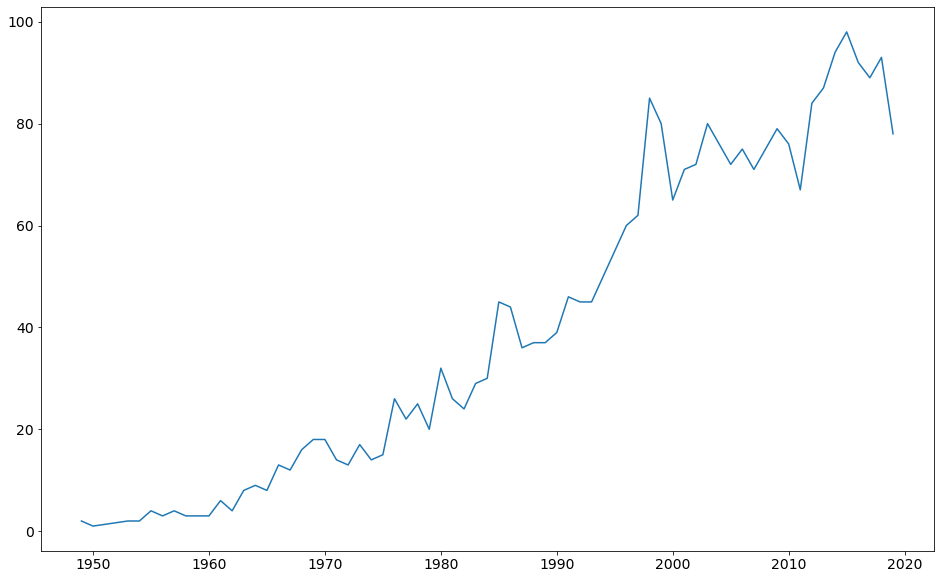

In [16]:
# 연도별 출시된 레고 테마수 시각화 
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})   # 연도별 테마 수 추출 
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)        # themes_by_year 컬럼명 변경 

# 연도별로 출시된 테마수 추세 그래프 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

plt.show()

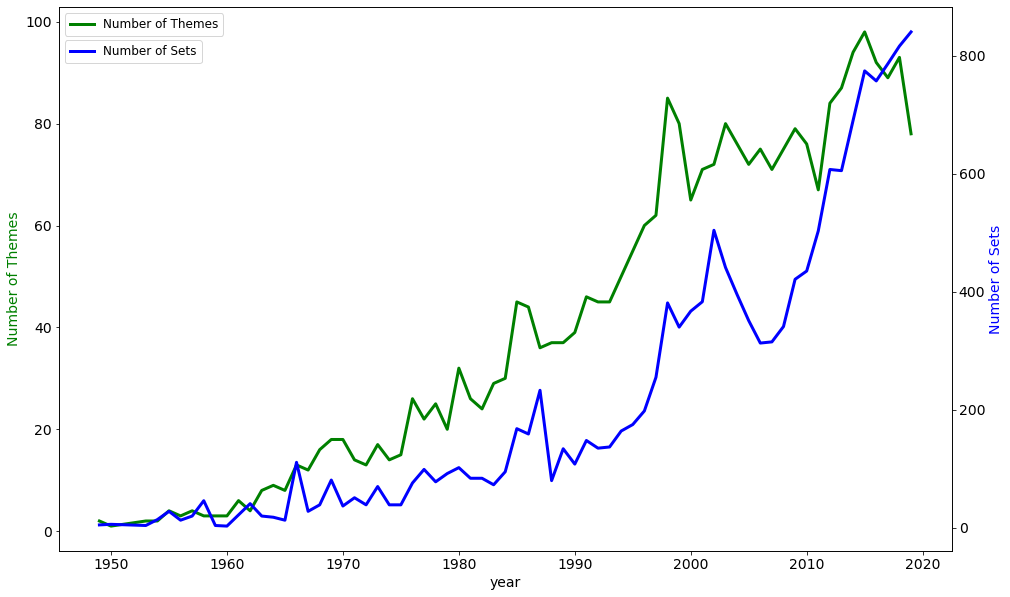

In [33]:
# 축 개체에 또 다른 개체를 생성 후 그래프 그리기 - 스타일 추가 
fig, ax1 = plt.subplots(figsize=(16, 10))     # 현재 축을 얻고 
ax2 = ax1.twinx()                             # 동일한 x축을 공유하는 다른 축 생성

# 차트 설정 및 스타일 추가 
# 레고 테마
ax1.plot(themes_by_year.index[:-2],           # x축 데이터 설정 
         themes_by_year.nr_themes[:-2],       # y축 데이터 설정 
         label='Number of Themes',            # ax1 y축 레이블 설정
         linewidth=3,                         # 라인 두께 설정 
         color='g')                           # 라인 색상 설정
# 레고 세트
ax2.plot(sets_by_year.index[:-2],             # x축 데이터 설정 
         sets_by_year.set_num[:-2],           # y축 데이터 설정 
         label='Number of Sets',              # ax2 y축 레이블 설정
         linewidth=3,                         # 라인 색상 설정
         color='b')                           # 라인 색상 설정 

# 레이블 추가 
ax1.set_xlabel('year', fontsize=14)                                # x축 레이블 추가 - 레이블 폰트 설정 
ax1.set_ylabel('Number of Themes', color='green', fontsize=14)     # y축 첫 번째 레이블 추가 - 색상 설정: green
ax2.set_ylabel('Number of Sets', color='blue', fontsize=14)        # y축 두 번째 레이블 추가 - 색상 설정: blue

# 눈금 레이블의 글꼴 크기 설정
ax1.tick_params(axis='both', labelsize=14)                         # ax1 모든축 폰트 설정          
ax2.tick_params(axis='both', labelsize=14)                         # ax2 모든축 폰트 설정 

ax1.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0.0, 1.0))   # ax1 범레 설정 - 범례 위치, 폰트 사이즈, 위치 조정
ax2.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0.0, 0.95))  # ax2 범레 설정 - 범례 위치, 폰트 사이즈, 위치 조정

plt.show()

- 레고가 운영 초반 몇 년 동안은 10가지 미만의 서로 다른 세트를 출시했다는 점을 알 수 있다. 
- 생산한 세트 수가 급격히 증가한 것은 1990년대 중반 이었다. 
- 2000년대 초반에 잠시 하락했고, 2005년경 강한 회복을 보여주다. 그러다가 2019년부터 회사가 놀랄 정도로 성장하여 해당 한해 동안 840 세트나 출시 하였다.
- 차트에서 레고가 1990년대 중반까지 꽤 일관되게 점점 더 많은 테마를 추가했음을 알 수 있다. 그리고 2010년대 초반까지 약 10년 동안 테마의 수는 정체되었다.

### 3-3. 해가 갈수록 레고 세트의 크기와 복잡도는 어떨까? 

In [34]:
# 연도별 세트당 부품수 
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})           # 레고 세트당 평균 부품 개
parts_per_set.rename(columns={'num_parts':'average_num_parts'}, inplace=True)     # 컬럼명 변경
parts_per_set

,average_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


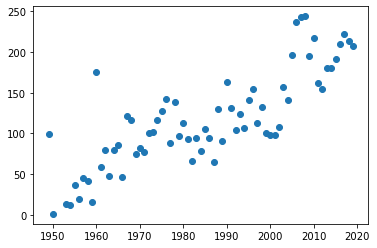

In [37]:
# 산점도 그래프
x = parts_per_set.index[:-2]
y = parts_per_set.average_num_parts[:-2]

plt.scatter(x, y) 

plt.show()

- 차트를 보면 평균 부품수를 기준으로 레고 세트의 크기와 복잡도가 증가하는 흐름을 확실히 파악할 수 있다.
- 2010년대에는 평균 세트에 약 200개 이상의 개별 부품이 들어있었는데, 이는 1960년대 레고 세트에 들어 있던 개별 부품수의 약 두 배 정도이다.

### 3-4. 레고에서 가장 많은 세트를 보유한 테마는 어떤 것일까? 

In [38]:
# themes.csv 파일 열기 
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [40]:
# 레고 테마당 세트 개수 시리즈를 데이터프레임으로 변환 
set_theme_count = sets['theme_id'].value_counts()
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                               'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [41]:
# 두 데이터프레임(set_theme_count, themes) merge 하기 
merge_df = pd.merge(set_theme_count, themes, on='id')
merge_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


- 두 개의 데이터프레임을 하나의 특정 열에 ".merge()"하기 위해서는 해당 두 데이터프레임 및 병합한 열 이름을 알려줘야 한다. 그래서 "on='id'"를 설정한 것이다.
- 병합한 데이터프레임을 확인해보니 스타워즈는 진정 가장 많은 레고 세트를 낸 테마라는걸 세삼 느낀다.

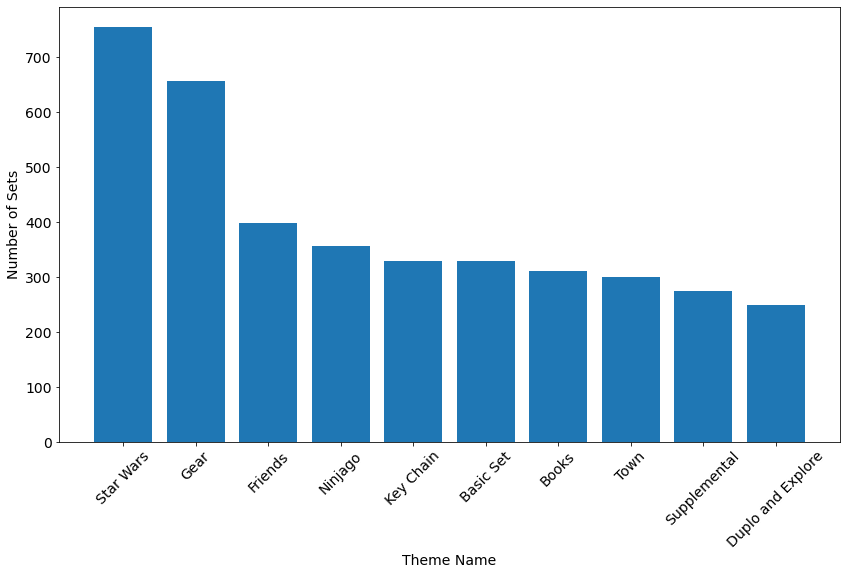

In [43]:
# 병합한 데이터프레임을 바탕으로 상위 10개 테마를 표시하는 막대 차트 그리기 
plt.figure(figsize=(14, 8))                       # 차트 사이즈 설정 
plt.xticks(fontsize=14, rotation=45)              # x축 폰트 사이즈 및 폰트 회전 각도 조절 
plt.yticks(fontsize=14)                           # y축 폰트 사이즈 조절
plt.ylabel("Number of Sets", fontsize=14)         # y축 label 설정  
plt.xlabel("Theme Name", fontsize=14)             # x축 label 설정 

plt.bar(merge_df.name[:10], merge_df.set_count[:10])   # 막대 차트 설정 (x축, y축 데이터 설정)

plt.show()

## 분석 결과 

### 1. 지금까지 만들어진 가장 거대한 레고 세트는 무엇이며 몇 개의 부품으로 구성되어 있을까?
- 데이터셋 기준 만들어진 가장 거대한 레고 세트는 부품수 9,987개로 구성된 "Chima"시리즈의 "The Ultimate Battle for Chima" 세트 이다.

<img src="assets/chima.png">

### 2. 최초의 레고 세트가 출시된 연도와 처음 출시되었을 때 회사에서 판매한 세트 수는 몇 개일까?
- 최초의 레고 세트가 출시된 연도는 "1949년"이고 출시된 세트는 "Extra-Large Gift Set (ABB)" 이다.
- 처음 출시된 연도 기준으로 회사에서 판매한 레고 세트 수는 5개로 확인되었다.

<img src="assets/700-1-1.png">

### 3. 레고에서 가장 많은 세트를 보유한 테마는 어떤 것일까? 해리포터, 닌자고, 프렌즈 아니면 다른 것일까?
- 레고에서 가장 많은 세트를 보유한 테마는 스타워즈 시리즈 였다.

<img src="assets/lego_star_wars.png" width="40%" height="30%">

### 4. 레고 회사는 실제로 언제 출시된 제품을 기반으로 도약했을까? 매년 몇 개의 테마와 세트가 출시될까?
- 레고가 운영 초반 몇 년 동안은 10가지 미만의 서로 다른 세트를 출시했다는 점을 알 수 있다. 
- 생산한 세트 수가 급격히 증가한 것은 1990년대 중반 이었다. 
- 2000년대 초반에 잠시 하락했고, 2005년경 강한 회복을 보여주다. 그러다가 2019년부터 회사가 놀랄 정도로 성장하여 해당 한해 동안 840 세트나 출시 하였다.
- 차트에서 레고가 1990년대 중반까지 꽤 일관되게 점점 더 많은 테마를 추가했음을 알 수 있다. 그리고 2010년대 초반까지 약 10년 동안 테마의 수는 정체되었다.

### 5. 레고 세트는 해가 갈수록 크기와 복잡도가 늘어날까? 예전 레고 세트는 요즘 세트와 비교했을 때 부품이 더 적을까
- 평균 부품수를 기준으로 레고 세트의 크기와 복잡도가 증가하는 흐름을 확실히 파악할 수 있었다.
- 2010년대에는 평균 세트에 약 200개 이상의 개별 부품이 들어있었는데, 이는 1960년대 레고 세트에 들어 있던 개별 부품수의 약 두 배 정도이다.